In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import sys

In [2]:
def letsplay(players, ncards, printmode,score_stich, score_game,did_cheat):
  """
  Plays one single match.
  Keyword arguments:
    players      -- an array with the bots
    ncards       -- the number of cards for this match
    printmode    -- whether to print or not  
    score_stich  -- scoring for one stich
    score_game   -- scoring for the whole match
    did_cheat    -- checks whether someone cheated
  Return:
    points       -- the points after the match
  """
  #printIntro()

  nplayers = len(players)
  stiche = np.zeros(nplayers)
  history = -np.ones((ncards,nplayers),dtype=int)
  playerorder = np.arange(nplayers)
  for nturn in range(ncards):
    #print(playerorder)
    for playerid in playerorder:
      #print(history[:nturn+1,:])
      cheated = did_cheat(history)
      player = players[playerid]
      if nturn == 0: # first round, everyone plays with cards covered
        card = player(nplayers, ncards, nturn, playerid,  -np.ones((ncards,nplayers),dtype=int), cheated)
      else: # after that, we go round-robin with open cards
        card = player(nplayers, ncards, nturn, playerid, history, cheated)

      history[nturn,playerid] = card

    
    stich, winnerid =score_stich(history[nturn,:], did_cheat(history))
    stiche += stich
    playerorderCopy = playerorder
    playerorder = np.roll(np.arange(nplayers),-winnerid) # winner comes first next round

    #if True:
     #print()
     # print(history[:nturn+1])
    if printmode:
      printTurn(cheated,nturn,stich,history[nturn,:],playerorderCopy)

  score = score_game(stiche,did_cheat(history))
  if printmode:
    printResults(stiche, score)

  return score,stiche, history


def printTurn(cheated, nturn,stich,cards, playerorder):
  time.sleep(1)
  print("\n")
  print(f"############### TURN {nturn} #################")
  print(f"# Team {playerorder[0]} opens the round!              #")
  print(f"# Team 0 plays: {int(cards[0])}                      #")
  print(f"# Team 1 plays: {int(cards[1])}                      #")
  print(f"# Team 2 plays: {int(cards[2])}                      #")
  print(f"# Team 3 plays: {int(cards[3])}                      #")
  print( "# ------------------------------------ #")
  if(any(cheated)):
    print("# There are teams that try to cheat!   #")
  if(cheated[0]):
    print("# Team 0 is disqualified this game!    #")
  if (cheated[1]):
    print("# Team 1 is disqualified this game!    #")
  if (cheated[2]):
    print("# Team 2 is disqualified this game!    #")
  if (cheated[3]):
    print("# Team 3 is disqualified this game!    #")
  if (any(cheated)):
    print( "# ------------------------------------ #")

  gewinner = np.count_nonzero(stich)
  if(gewinner == 1):
    player = 0
    for i in stich:
      if(i >0):
        print(f"# Team {player} wins this round!              #")
        print(f"# Congrats! They get 1 point           #")
        print(f"# and will open the next round.        #")
      player+=1

  if(gewinner >1):
    print(f"# We have a draw this round.           #")
    print(f"# All winners get " + "{:.1f}".format(1/gewinner) + " points.          #")
    print(f"# The opener is randomly chosen.       #")

  print( "########################################")
  #input(" \nPRESS ANY KEY TO START THE NEXT ROUND !!!\n")


  #print(f"\n\n\nIt's turn {nturn}. Up to now, the points are:")
  #for playerid, point in enumerate(stiche - stich):
  #  print("Group {}: {:.3f}".format(playerid, point), end=" ")
  #print("\n\nThis turn, the cards played are:")
  #for playerid, card in enumerate(cards):
  #  print("Group {}: {}".format(playerid, int(card)))
  #print("\n\nAnd the points rewarded are:")
  #for playerid, point in enumerate(stich):
  #  print("Group {}: {:.3f}".format(playerid, point), end=" ")

  return 0

def printResults(stiche, score):
  print(f"\n############## GAME OVER ###############")
  print(f"# Final Score:                         #")
  print(f"#Team 0 has {stiche[0]} stiche ==> {int(score[0])} points!   #")
  print(f"#Team 1 has {stiche[1]} stiche ==> {int(score[1])} points!   #")
  print(f"#Team 2 has {stiche[2]} stiche ==> {int(score[2])} points!   #")
  print(f"#Team 3 has {stiche[3]} stiche ==> {int(score[3])} points!   #")
  print("########################################")
  #input(" \nPRESS ANY KEY TO EXIT !!!\n")

 # print("\n\nThe game ended. Final score:")
 # for playerid, point in enumerate(stiche):
 #   print("Group {}: {:.3f}".format(playerid, point), end=" ")
 # print("\n\nPoints for this game:")
 # for playerid, point in enumerate(score):
 #   print("Group {}: {:.3f}".format(playerid, point), end=" ")

  return 0

def printIntro():
  print("#########################################")
  print("#  ♥♠  _____    _     ___   ___    ♦♣   #")
  print("#  ♠♦ /    |   / \\   |  |  |   \\   ♣♥   #")
  print("#  ♦♣ |       /___\\  |__   |   |   ♥♠   #")
  print("#  ♣♥ \\____| /     \\ |  \\  |__/    ♠♦   #")
  print("#                                      #")
  print("#    _   .   _   ___  _    _  ______   #")
  print("#   | \\  |  ||  /     |    |    ||     #")
  print("#   |  \\ |  ||  |  _  |----|    ||     #")
  print("#   |   \\|  ||  \___| |    |    ||     #")
  print("#                                      #")
  print("########################################")
  print("\n")
  input(" PRESS ANY KEY TO START !!!")

  return 0


def score_stich(cards, cheated):
  """Distributes the reward and return winner id."""

  cardscopy = np.copy(cards)
  cardscopy[cheated] = -99999999

  winner = cardscopy == np.max(cardscopy)
  # Normalize reward:
  # 1 winner: 1   point
  # 2 winnnr: 1/2 points
  # 3 winner: 1/3 points
  # 4 winner: 1/4 points
  # (but the code should work with n players too)
  points =  winner / np.sum(winner)

  # find out which player won (if multiple winner, pick one)
  winnerid = np.random.permutation(np.argwhere(cardscopy == np.max(cardscopy)))[0]
  return points, winnerid

def score_game(cards, cheated):
  """Distributes the points after a full match."""

  winner = cards == np.max(cards)
  cardsCpy = np.copy(cards)
  result = np.zeros(len(winner))
  alreadyWon = np.zeros(len(winner))

  # filter out cheater
  for i in range(0,len(winner)):
      if(cheated[i] == True):
        alreadyWon[i] = 1
        cardsCpy[i] = -1

  # first places
  for i in range(0,len(winner)):
    if(winner[i] == True and alreadyWon[i]== 0):
      result[i] = 3
      alreadyWon[i] = 1
      cardsCpy[i] = -1

  # second places
  winner = cardsCpy == np.max(cardsCpy)
  for i in range(0,len(winner)):
    if(winner[i] == True and alreadyWon[i]== 0):
      result[i] = 2
      alreadyWon[i] = 1
      cardsCpy[i] = -1

  # 3rd places
  winner = cardsCpy == np.max(cardsCpy)
  for i in range(0, len(winner)):
    if (winner[i] == True and alreadyWon[i] == 0):
      result[i] = 1
      alreadyWon[i] = 1
      cardsCpy[i] = -1



  # Normalize reward:
  # 1 winner: 3 points
  # 2 winnnr: 2 points
  # 3 winner: 1 point
  # 4 winner: 0 points
  # (but the code should work with n players too)
  return result



def did_cheat(history):
  """Determines who of the players has (at any point) cheated."""

  ncards, nplayers = history.shape
  cheated = False * np.ones(nplayers,dtype=bool)

  for i in range(nplayers):
    x = history[:,i]
    x = x[x>-1] # -1 entries are unplayed cards
    if len(np.unique(x)) != len(x): # duplicate cards
      cheated[i] = True
    for xi in x:
      if not xi in np.arange(ncards):
        cheated[i] = True # a card that is not in [0,...,ncards-1]
 
  return cheated


In [4]:
# valid random
def play0(nplayers, ncards, nturn, playerid, history, cheated):
  """
  Play the next card.
  Keyword arguments:
    nplayer   -- number of players in game (including you).
    ncards    -- number of initial cards (cards 0,...,ncards-1).
    nturn     -- number of turns already played.
    playyerid -- your player id to access the history matrix.
    history   -- matrix of size (ncards,nplayers) with the cards already played.
                 Note: 
                      -- "unplayed slots" are filled with -1
                      -- after the first round, the winner will come first and we go round-robin with open cards
                         so if you are third in line, you can see the cards of other two player in the row `nturn` of history
  Return:
    card      -- the card that you play this turn. It has to be valid!
  """

  # As an example, this bot plays a random, unplayed card.

  mycards = history[:nturn,playerid]     # these are the cards I played

  possiblecards = np.arange(ncards) # cards from 0 to ncards -1 

  validcards = np.setdiff1d(possiblecards,mycards) # cards I can still play

  shuffle = np.random.permutation(validcards) # shuffle

  return shuffle[0] # return the first of the shuffled cards

# top down
def play1(nplayers, ncards, nturn, playerid, history, cheated):  
  # this player plays the cards from ncards-1 to 0
  return ncards-1-nturn

# bottom up
def play2(nplayers, ncards, nturn, playerid, history, cheated):  
  # this player plays the cards from 0 to ncards-1
  return nturn


[146. 161. 244. 222.]


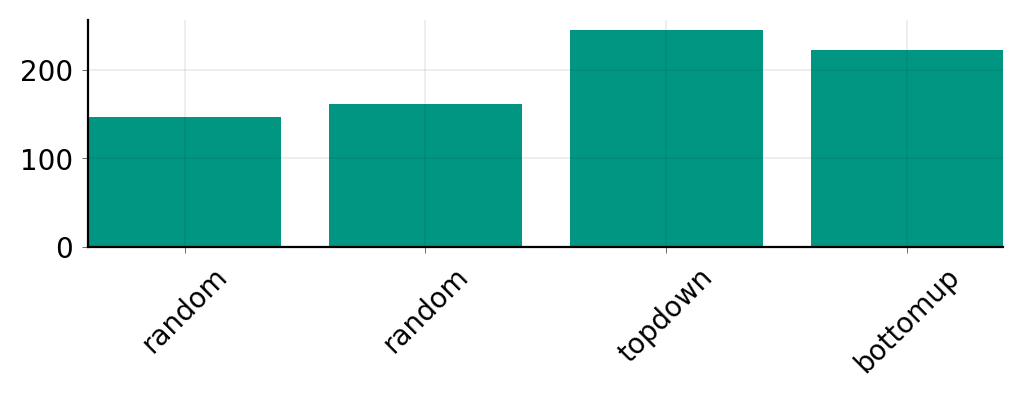

In [5]:
players = [play0, play0, play1, play2]
nplayer =len(players)
description = ["random", "random", "topdown", "bottomup"]
ngames = 100
ncards = 10
toprint = False

overall_score = np.zeros(nplayer)
for game in range(ngames):
  score, stiche, history = letsplay(players,ncards,toprint,score_stich,score_game,did_cheat);
  overall_score += score
print(overall_score)
plt.style.use("https://raw.githubusercontent.com/camminady/kitstyle/master/kitishnotex.mplstyle")
fig,ax = plt.subplots()
ax.bar(np.arange(nplayer), overall_score)
ax.set_xticklabels(description)
ax.set_xticks(np.arange(nplayer));
plt.xticks(rotation=45);